In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Загрузим уже обработанные в прошлом ДЗ данные!

In [232]:
df = pd.read_csv('processed_sigma.csv')
df = df.drop("Trip_ID", axis=1)

# Определим признаки и целевую переменную
X = df.drop("Surge_Pricing_Type", axis=1)
y = df["Surge_Pricing_Type"]

# Задание 2
### Principal component analysis (PCA)

Спроецируйте данные на двумерную плоскость, используя `PCA`. Другими словами, выделите первые две главные компоненты и изобразите данные в осях этих компонент. Не забудьте центрировать признаки перед применением метода. 

**Какую долю изначальной дисперсии (информации) содержат/объясняют в себе обе компоненты?** Для этого воспользуйтесь атрибутом `explained_variance_ratio_` у PCA-класса.

In [233]:
X.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,1,0,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,1,0,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,1,0,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,0,1,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,0,1,...,0,0,0,0,0,0,0,0,0,1


In [234]:
### Центрируем данные
X_centered = X - X.mean()
X_centered.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Type_of_Cab_B,Type_of_Cab_C,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,-37.430909,-5.015912,-0.373758,1.055542,-0.782838,-22.474883,-5.2028,-15.099019,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,-0.71319
1,-14.730909,3.984088,-0.018998,0.600542,-0.782838,-24.474883,4.7972,2.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
2,-2.620909,3.984088,-0.003398,0.651792,1.217162,-1.474883,4.7972,1.900981,0.610017,-0.213592,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
3,17.359091,3.984088,-0.003398,0.604292,-0.782838,-1.474883,0.7972,-1.099019,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681
4,10.749091,3.984088,0.233082,0.553042,3.217162,-11.474883,-2.2028,26.900981,-0.389983,0.786408,...,-0.014811,-0.011309,-0.00957,-0.006175,-0.005279,-0.005165,-0.004884,-0.000706,-0.000744,0.28681


In [235]:
# Проверка
X_centered.sum()

Trip_Distance                    3.107061e-10
Customer_Since_Months           -9.780621e-12
Life_Style_Index                -7.218226e-11
Customer_Rating                  1.475797e-11
Cancellation_Last_1Month         1.279066e-11
Var1                             1.982130e-10
Var2                            -3.268212e-10
Var3                             6.160690e-10
Type_of_Cab_B                    4.130030e-13
Type_of_Cab_C                    6.195044e-13
Type_of_Cab_D                   -1.147527e-12
Type_of_Cab_E                    4.254375e-13
Confidence_Life_Style_Index_B   -4.088285e-12
Confidence_Life_Style_Index_C   -8.597567e-13
Destination_Type_B              -1.025846e-12
Destination_Type_C              -3.014478e-12
Destination_Type_D              -2.078338e-13
Destination_Type_E               1.273648e-12
Destination_Type_F               3.705924e-13
Destination_Type_G              -6.710188e-13
Destination_Type_H              -5.373479e-14
Destination_Type_I              -1

Близко к нулю, значит успешно центрировали.

In [236]:
from sklearn.decomposition import PCA

# Создание экземпляра PCA с двумя компонентами
pca = PCA(n_components=2)

# Применение PCA к набору данных и преобразование его в низкоразмерное представление
PCA_dataset = pca.fit_transform(X_centered)

# Конвертация полученного массива NumPy в объект pandas DataFrame с двумя столбцами 'PCA_1' и 'PCA_2'
PCA_dataset = pd.DataFrame(PCA_dataset, columns=['PCA_1', 'PCA_2'])

# Вывод на экран первых нескольких строк преобразованного набора данных
PCA_dataset.head()


,PCA_1,PCA_2
0,-38.743132,-23.282634
1,-13.209252,-25.023815
2,-2.004910,-1.637085
3,17.178458,-0.907657
4,14.477389,-11.656752


In [237]:
pca.explained_variance_ratio_

array([0.63176117, 0.21129863])

In [238]:
# Получение долей объясненной дисперсии для каждой компоненты
explained_variance_ratio = pca.explained_variance_ratio_

# Вывод на экран доли объясненной дисперсии для каждой компоненты
print("Explained variance ratio for PCA_1:", explained_variance_ratio[0])
print("Explained variance ratio for PCA_2:", explained_variance_ratio[1])

# Вычисление общей доли объясненной дисперсии
total_explained_variance = explained_variance_ratio.sum()

# Вывод на экран общей доли объясненной дисперсии
print("Total explained variance by both components:", total_explained_variance)


Explained variance ratio for PCA_1: 0.631761173664434
Explained variance ratio for PCA_2: 0.21129862994557394
Total explained variance by both components: 0.8430598036100079


# Задание 3
Изобразите heatmap корреляции изначальных признаков с новыми двумя главными компонентами. \
**Какие признаки коррелируют с первой компонентой? Какие со второй? В качестве порогового значения договоримся о корреляции >= 0.5 по абсолютному значению **


In [239]:
# Вычисление корреляции между каждым из исходных признаков в наборе данных X и первой главной компонентой (PCA_1)
first_component_corr = X.corrwith(PCA_dataset.PCA_1)

# Вычисление корреляции между каждым из исходных признаков в наборе данных X и второй главной компонентой (PCA_2)
second_component_corr = X.corrwith(PCA_dataset.PCA_2)

# Объединение двух серий корреляции в один объект DataFrame, располагая их рядом друг с другом (axis=1)
corrs = pd.concat((first_component_corr, second_component_corr), axis=1)

# Присвоение имен столбцов 'PCA_1' и 'PCA_2' объединенному объекту DataFrame
corrs.columns = ['PCA_1', 'PCA_2']

# Вывод на экран объекта DataFrame, содержащего корреляции между исходными признаками и главными компонентами
corrs


,PCA_1,PCA_2
Trip_Distance,0.997767,0.018410
Customer_Since_Months,0.121591,0.003500
Life_Style_Index,0.480658,-0.025901
Customer_Rating,-0.070104,-0.003757
Cancellation_Last_1Month,0.000803,0.008960
Var1,-0.048532,0.998600
Var2,0.247178,-0.028448
Var3,0.293819,-0.026583
Type_of_Cab_B,-0.048751,0.005723
Type_of_Cab_C,-0.012059,-0.003397


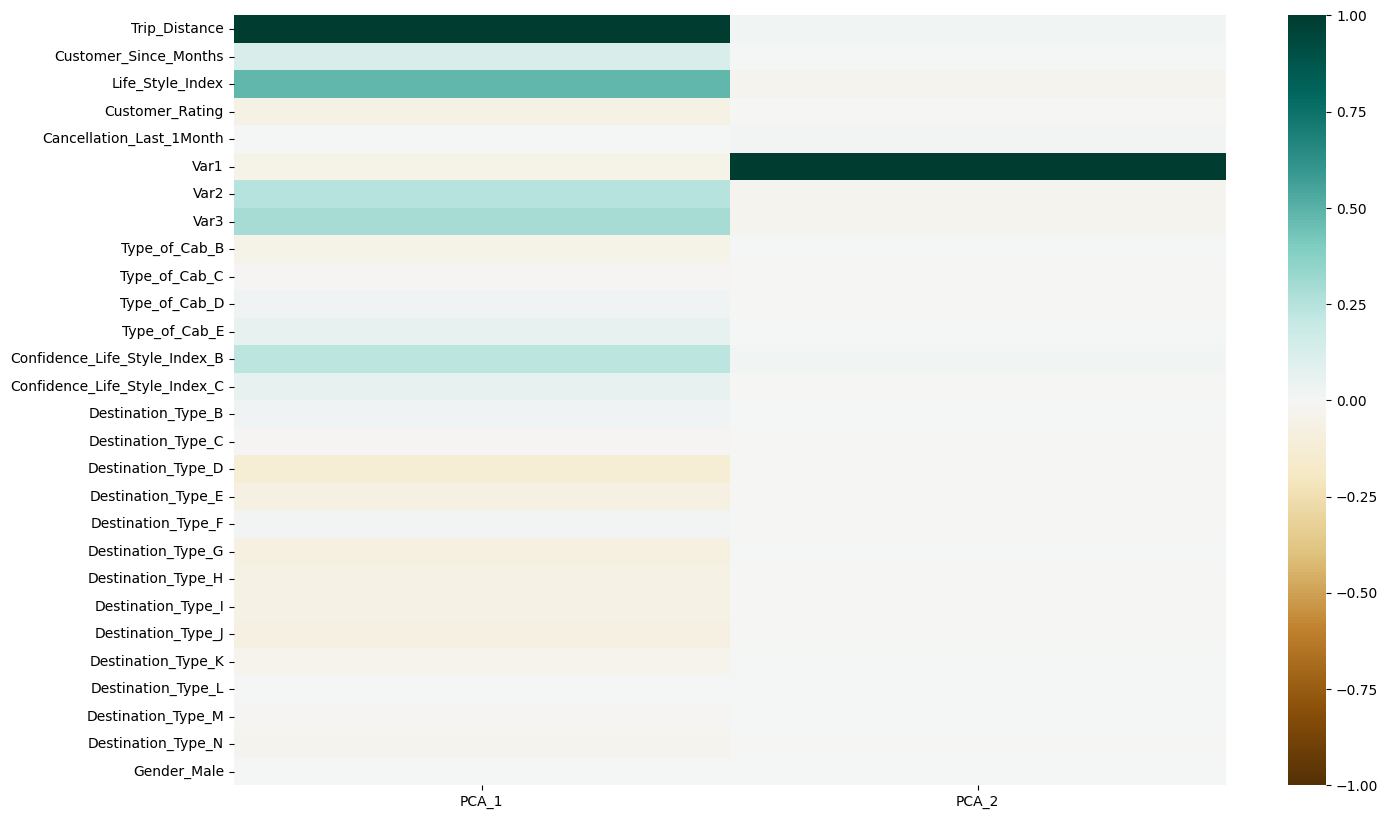

In [240]:
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

**Задание 3.** Изобразите двумерную проекцию данных с метками классов. Выделите третью главную компоненту и аналогично нарисуйте трехмерную проекцию с метками классов. \
**Какие признаки коррелируют с третьей компонентой?**

In [241]:
### Провернем все то же самое для 3 компонент!

pca_3d = PCA(n_components=3)
pca_3d.fit(X_centered)
PCA_dataset_3d = pca_3d.transform(X_centered)
PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'PCA_3'])

PCA_dataset_3d.head()

,PCA_1,PCA_2,PCA_3
0,-38.743132,-23.282634,-11.303274
1,-13.209252,-25.023815,5.664106
2,-2.004910,-1.637085,3.663032
3,17.178458,-0.907657,-3.191676
4,14.477389,-11.656752,22.999348


In [242]:
### Что содержится в новых признаках?

first_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_1)
second_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_2)
third_component_corr_3d = X.corrwith(PCA_dataset_3d.PCA_3)

corrs_3d = pd.concat((first_component_corr_3d, 
                      second_component_corr_3d, 
                      third_component_corr_3d), axis=1)

corrs_3d.columns = ['PCA_1', 'PCA_2', 'PCA_3']

corrs_3d

,PCA_1,PCA_2,PCA_3
Trip_Distance,0.997767,0.018410,-0.064176
Customer_Since_Months,0.121591,0.003500,0.081370
Life_Style_Index,0.480658,-0.025901,0.166688
Customer_Rating,-0.070104,-0.003757,-0.236793
Cancellation_Last_1Month,0.000803,0.008960,0.136222
Var1,-0.048532,0.998600,0.021003
Var2,0.247178,-0.028448,0.705159
Var3,0.293819,-0.026583,0.951081
Type_of_Cab_B,-0.048751,0.005723,0.011211
Type_of_Cab_C,-0.012059,-0.003397,-0.008707


Советуем еще и замерить попарные корреляции между главными компонентами! Это поможет в ответе на один из тестовых вопросов.

In [243]:
corr1 = np.corrcoef(PCA_dataset_3d.iloc[:, 1], PCA_dataset_3d.iloc[:, 2])
print(f"Корреляция между второй и третьей главными компонентами: {corr1[0, 1]}")


Корреляция между второй и третьей главными компонентами: 8.532938792086148e-17


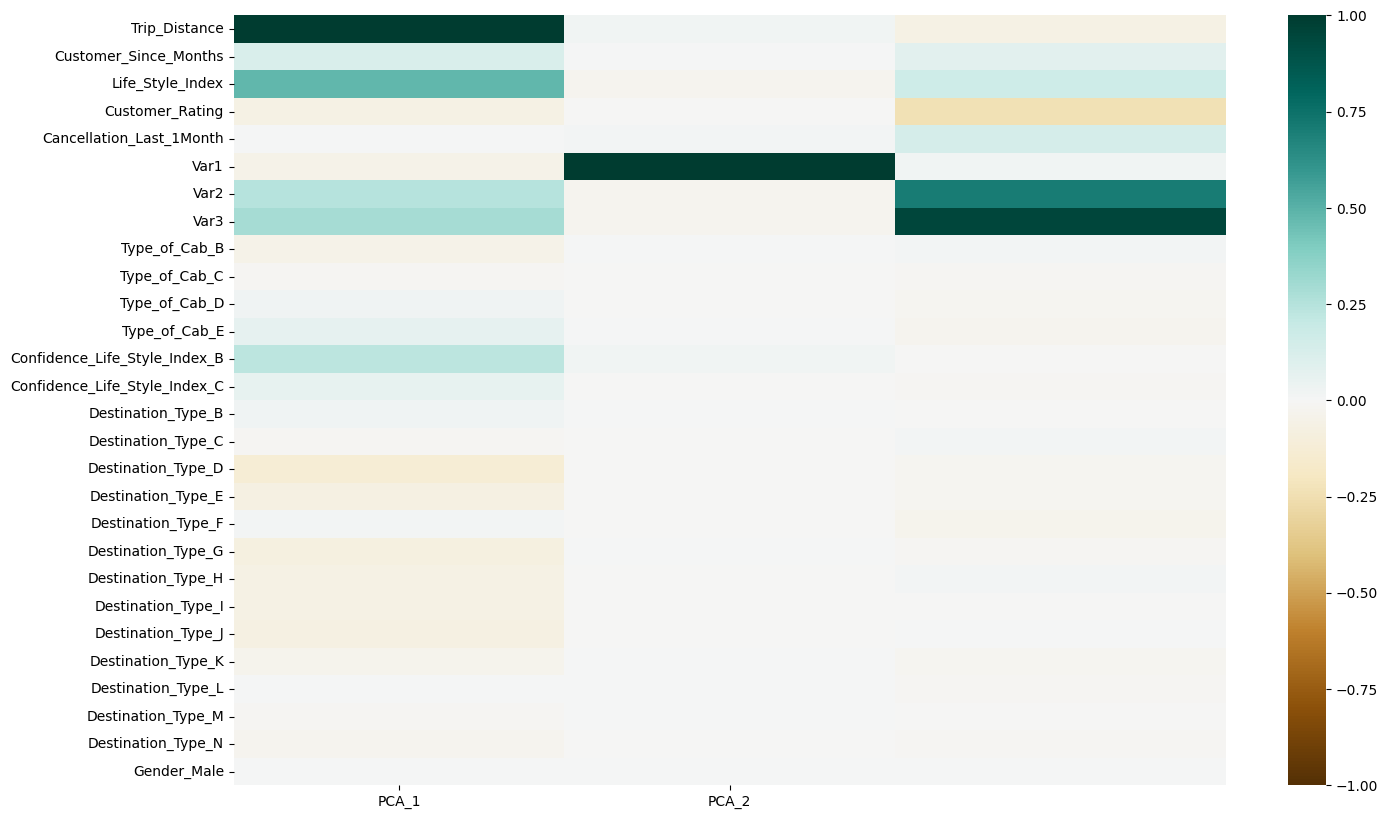

In [244]:
fig = plt.figure()

fig.set_size_inches(16, 10)

sns.heatmap(corrs_3d, 
            xticklabels=corrs.columns,
            yticklabels=corrs.index,
            cmap='BrBG',
            vmin=-1,
            vmax=1)

plt.show()

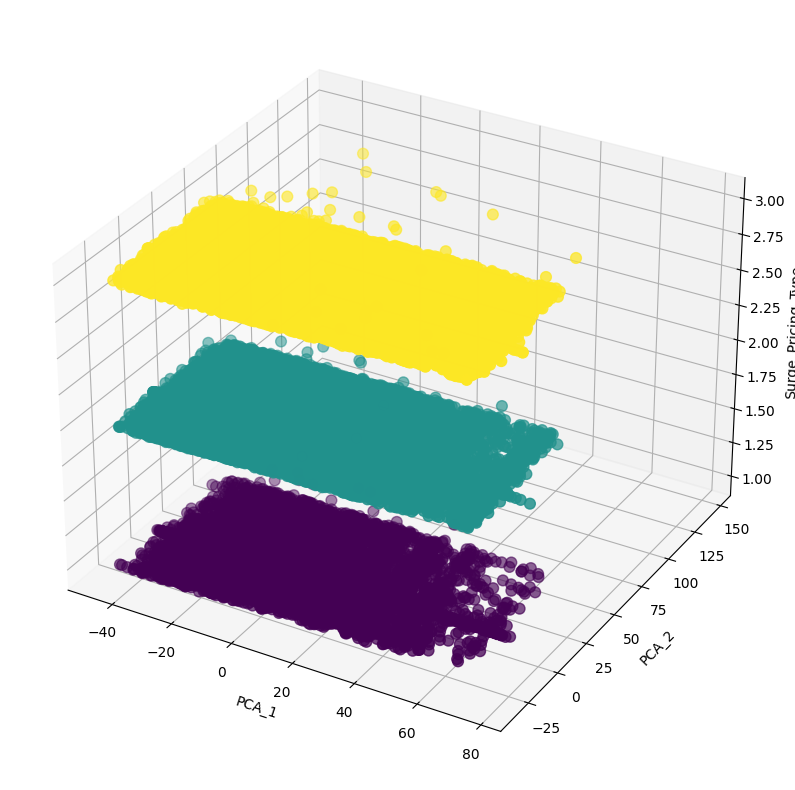

In [245]:
PCA_dataset_3d = np.concatenate((PCA_dataset.values, y.values.reshape(-1, 1)), axis=1)
PCA_dataset_3d = pd.DataFrame(PCA_dataset_3d, columns=['PCA_1', 'PCA_2', 'Surge_Pricing_Type'])

fig = plt.figure()
fig.set_size_inches(16, 10)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA_dataset_3d['PCA_1'], PCA_dataset_3d['PCA_2'], PCA_dataset_3d['Surge_Pricing_Type'],
           c=PCA_dataset_3d['Surge_Pricing_Type'], cmap="viridis", s=60)
ax.set_xlabel("PCA_1")
ax.set_ylabel("PCA_2")
ax.set_zlabel("Surge_Pricing_Type")
plt.show()


# Задание 5

Обучите логистическую регрессию на первых двух компонентах центрированных данных и подберите гиперпараметры. Обучите логистическую регрессию на центрированных данных и подберите гиперпараметры. **Сравните метрику accuracy и f1-score на тестовой выборке в двух моделях**.

P.S. для удобства, скорости и нормализации данных (понадобится, так как захотим повалидироваться на параметрах регуляризации) можно построить конструкцию Pipeline c 3 следующими степами: StandardScaler -> PCA -> LogisticRegression

In [249]:
np.random.seed(2022)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


# Разбиение набора данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

# Создаем pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=2)),
                 ('logreg', LogisticRegression())])

# Настройка параметров
param_grid = {'logreg__penalty': ['l1', 'l2', 'elasticnet'],
              'logreg__C': [1e-5, 0.0001, 0.001, 0.01]}

# Подбор параметров с помощью GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=1)

# Обучение модели
grid_search.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = grid_search.predict(X_test)

# Вывод на экран отчета о классификации
print(classification_report(y_test, y_pred, digits=3))
print(classification_report(y_test, pipe.predict(X_test), digits=3))

# Вывод на экран лучших параметров
print(grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
              precision    recall  f1-score   support

           1      0.000     0.000     0.000      5372
           2      0.478     0.693     0.566     11349
           3      0.493     0.507     0.500      9612

    accuracy                          0.484     26333
   macro avg      0.324     0.400     0.355     26333
weighted avg      0.386     0.484     0.426     26333



NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Кажется, достаточно сильно теряем в качестве! Может, добавить компонент?

**Задание 5.** Обучите модели логистической регресии на нескольких различных компонентах: [2, 4, 8, 16, 28]. **Нарисуйте графики зависимости accuracy, f1-score от количества компонент. Введите их значения через запятую**. При обучении используйте l2-регуляризацию, гиперпараметр C подбирайте по сетке. 


In [247]:
### Чтобы не заставлять вас писать похожий на предыдущий код,
### Написали функцию, которая будет обучать модель для
### произвольного числа n_components главных компонент.

def train_pca_i(n_components, X_train, y_train):
    pipe = Pipeline([('scaler', StandardScaler()), 
                     ('pca', PCA(n_components=n_components)),
                     ('model', LogisticRegression(penalty='l2', solver='saga',random_state=1))])
    
    param_grid = {'model__C': [0.0001, 0.001, 0.01, 0.1]}
    
    grid = GridSearchCV(pipe, param_grid, cv=5)
    grid.fit(X_train, y_train)
    
    report = classification_report(y_test, grid.predict(X_test), output_dict=True)
    return (report['accuracy'], 
            report['weighted avg']['f1-score'])

In [248]:
%%time
accuracy_dict, f1_score_dict = {}, {}
components_list = [2, 4, 8, 16, 28]

for n_components in components_list:
    
    ### Your code is here
    
    

SyntaxError: incomplete input (<unknown>, line 8)

Обычно, когда решается какая-то высокоразмерная предсказательная задача, где тысячи признаков, функция качества PCA моделей похожа на параболу ветвями вниз в зависимости от количества компонент (для совсем маленьких и больших n_component качество маленькое, при этом есть где-то промежуточное значение).

Как думаете, почему здесь у нас непрерывно растущие графики качества?

Может, изначальные признаки были слишком хороши?

### t-SNE

Напомним, что метод заключается в введении некоторых функций, основанных на расстоянии между признаками, которые измеряют близость объектов. Функций, как вы помните, две, и они заданы в исходном и новом пространствах соотвественно. Далее минимизируем дивергенцию Кульбака-Лейблера по координатaм в новом пространстве

**Задание 6.** Обучите t-sne c `n_components=2` на изначальных данных и визуализируйте результаты с учетом известных классов. 

P.S. если устанете ждать обучения TSNE, или упадет ошибка по типу oom, то можно сократить число объектов в датасете до, например, пары тысяч. Это и следующее задания никак проверяться системой не будут. Вам достаточно повторить упражнение с практики и получить какое-то более адекватное (по сравнению с PCA) изображение классов.

In [ ]:
from sklearn.manifold import TSNE

### Your code is here



**Задание 7.** Обучите t-sne с `n_components=3` на изначальных данных и визуализируйте результаты с учетом известных классов.

In [ ]:
### Your code is here



Советуем обрезать датасет до маленького числа объектов (чтобы точки и их группки были хорошо различимы) и поиграться с гиперпараметрами класса Tsne! Обычно такая "игра" может привести к куда более красивым результатам по сравнению с теми, что получены с дефолтными настройками!